# Week 9

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [7]:
X = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Gradient Boost

In [13]:
baseline = GradientBoostingClassifier(random_state=42)
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
y_proba = baseline.predict_proba(X_test)[:, 1]
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline AUC:", roc_auc_score(y_test, y_proba))

Baseline Accuracy: 0.7592592592592593
Baseline AUC: 0.8874458874458875


Learning Rate

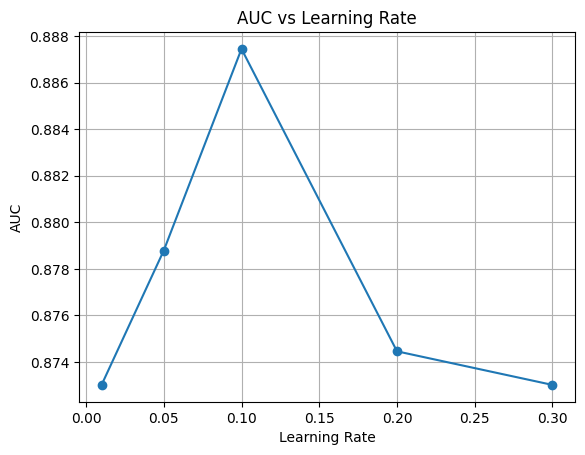

In [16]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
lr_results = []

for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    lr_results.append(auc)

plt.figure()
plt.plot(learning_rates, lr_results, marker='o')
plt.title("AUC vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.grid(True)
plt.show()

Number of Estimators

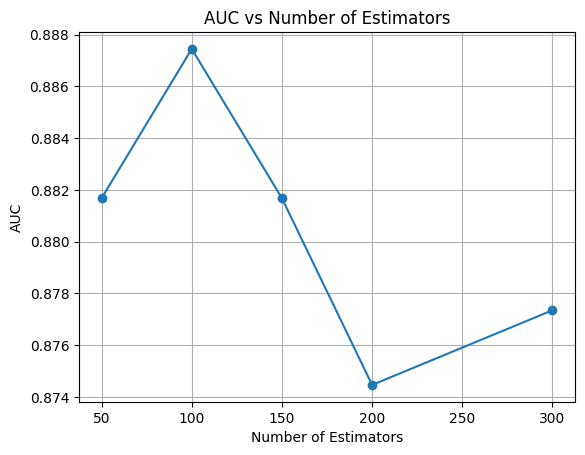

In [19]:
n_estimators_range = [50, 100, 150, 200, 300]
estimator_results = []

for n in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    estimator_results.append(auc)

plt.figure()
plt.plot(n_estimators_range, estimator_results, marker='o')
plt.title("AUC vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.grid(True)
plt.show()

Tree Depth

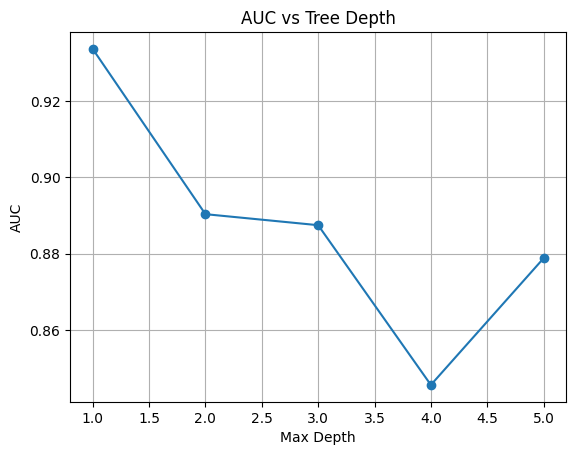

In [22]:
depth_range = [1, 2, 3, 4, 5]
depth_results = []

for depth in depth_range:
    model = GradientBoostingClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    depth_results.append(auc)

plt.figure()
plt.plot(depth_range, depth_results, marker='o')
plt.title("AUC vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.grid(True)
plt.show()

Regularization

In [25]:
subsample_values = [0.5, 0.7, 1.0]
max_features_values = [None, 'sqrt', 'log2']
regularization_results = []

for sub in subsample_values:
    for mf in max_features_values:
        model = GradientBoostingClassifier(subsample=sub, max_features=mf, random_state=42)
        model.fit(X_train, y_train)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        regularization_results.append((sub, mf, auc))

# Display best combo
best_reg = max(regularization_results, key=lambda x: x[2])
print(f"Best AUC with regularization: {best_reg[2]:.4f} (subsample={best_reg[0]}, max_features={best_reg[1]})")

Best AUC with regularization: 0.9163 (subsample=0.5, max_features=None)
